In [71]:
(ext:chdir "~/Development/clasp/extensions/cando/src/lisp/tests/boron/" t)

-1

In [72]:
(leap.core::clear-path)
(add-path "~/Development/clasp/extensions/cando/src/tests/boron/")
(add-path "~/Development/amber16/dat/leap/cmd/")
(add-path "~/Development/amber16/dat/leap/lib/")
(add-path "~/Development/amber16/dat/leap/parm/")
(add-path "~/Development/amber16/dat/leap/prep/")
(add-path "~/Development/amber16/dat/antechamber/")

(#P"/Users/tuj24515/Development/amber16/dat/antechamber/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/prep/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/parm/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/lib/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/cmd/"
 #P"/Users/tuj24515/Development/clasp/extensions/cando/src/tests/boron/")

In [73]:
(start-swank)

Swank is already running


NIL

#### Load the GAFF force field and boronic ester frcmod file.

In [74]:
(clear-force-field)
(load-atom-type-rules "ATOMTYPE_GFF.DEF")

(#<FORCE-FIELD ATOMTYPE_GFF.DEF>)

In [75]:
(load-amber-params "gaff.dat")

SIMPLE-WARNING: 
Warning!  Skipping 10-12 hbond
SIMPLE-WARNING: 
Warning!  Skipping force field atom equivalences


#<FORCE-FIELD gaff.dat>

In [76]:
(load-atom-type-rules "boron.def")

(#<FORCE-FIELD boron.def> #<FORCE-FIELD gaff.dat>
 #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

In [77]:
(load-amber-params "frcmod.boronic-ester")
(gethash :default leap.core::*force-fields*)

(#<FORCE-FIELD frcmod.boronic-ester> #<FORCE-FIELD boron.def>
 #<FORCE-FIELD gaff.dat> #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

#### Display a prototypical aryl boronic ester.

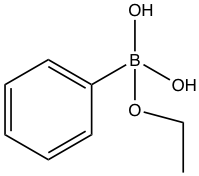

In [78]:
 (cl-jupyter-user:png-from-file "arylboronate2d.png")

Load the arylboronic ester from a Chemdraw file.

In [79]:
(defparameter *chemagg* (cando:load-chem-draw-aggregate "arylboronate.cdxml"))

*CHEMAGG*

In [80]:
(build-hydrogens *chemagg*)

NIL

Draw the 2D representation of the molecule loaded from the Chemdraw file.

In [81]:
(nglv::show-aggregate *chemagg*)

A Jupyter Widget

In [82]:
(:= *ff* (leap.core::merged-force-field))

SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb
SIMPLE-WARNING: 
Implement merge of FFVdwDb


*FF*

Automatically assign atom types.

In [83]:
(chem:assign-types *ff* *chemagg*)

NIL

In [84]:
(jostle *chemagg*)

NIL

Atomatically assign force-field parameters and minimize the energy of the molecule.

In [85]:
(energy:minimize *chemagg* :force-field *ff* :restraints-on nil)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000          14698.398
 minSDnP       0     2  0.000328   0.0        2908086.349           7466.206
 minSDnP       0     3  0.000393   0.0        2125950.454           5738.682
DONE absolute force test:
forceRmsMag(4360.014715).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     4  0.000000   0.0              0.000           4360.015
 minCGnP       0     5  0.000434  42.6        1437159.223           4007.581
 minCGnP       0     6  0.001253  64.8         770976.122           6296.848
 minCGnP       0     7  0.000105  24.7         701444.905           3016.654
 minCGnP       0     8  0.000379  31.8         582915.391           1761.154
 minCGnP       0     9  0.001054  71.9         536676.965           4581.595
 minCGnP       0    10  0.000033   0.0         516359.590 

#<ENERGY-FUNCTION >

Visualize the minimized structure and demonstrate that the force field parameters lead to the construction of a chemically reasonable structure.

In [86]:
(nglv::show-aggregate *chemagg*)

A Jupyter Widget

In [87]:
(chem:assign-types *ff* *chemagg*)

NIL

In [19]:
(chem:set-property *chemagg* :bounding-box '(30.0 30.0 30.0))

NIL

In [91]:
(leap.topology:save-amber-parm-format *chemagg* "boronic-ester.top" "boronic-ester.crd" *ff* :assign-types nil)

atom1: #<ATOM :C_142/:C> atom2: #<ATOM :O/:O> i1: 0 i2: 3
 atom1: #<ATOM :C_142/:C> atom2: #<ATOM :H_1421/:H> i1: 0 i2: 60
 atom1: #<ATOM :C_142/:C> atom2: #<ATOM :H_1422/:H> i1: 0 i2: 63
 atom1: #<ATOM :O/:O> atom2: #<ATOM :B/:B> i1: 3 i2: 9
 atom1: #<ATOM :C_144/:C> atom2: #<ATOM :C_142/:C> i1: 6 i2: 0
 atom1: #<ATOM :C_144/:C> atom2: #<ATOM :H_1443/:H> i1: 6 i2: 57
 atom1: #<ATOM :B/:B> atom2: #<ATOM :C_118/:C> i1: 9 i2: 12
 atom1: #<ATOM :C_118/:C> atom2: #<ATOM :C_116/:C> i1: 12 i2: 21
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 15 i2: 9
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 18 i2: 9
 atom1: #<ATOM :C_116/:C> atom2: #<ATOM :C_114/:C> i1: 21 i2: 27
 atom1: #<ATOM :C_120/:C> atom2: #<ATOM :C_118/:C> i1: 24 i2: 12
 atom1: #<ATOM :C_114/:C> atom2: #<ATOM :C_112/:C> i1: 27 i2: 33
 atom1: #<ATOM :C_110/:C> atom2: #<ATOM :C_112/:C> i1: 30 i2: 33
 atom1: #<ATOM :C_110/:C> atom2: #<ATOM :C_120/:C> i1: 30 i2: 24
 atom1: #<ATOM :C_110/:C> atom2: #<ATOM :H_110/:H> i1: 30 i2: 39


0

In [29]:
(defparameter *cat* (cando:load-chem-draw-aggregate "spiroligomer transglycosylase copy.cdxml"))

SIMPLE-ERROR: 
Could not find file spiroligomer transglycosylase copy.cdxml


NIL

In [89]:
(defparameter *fourmeragg* (cando:load-chem-draw-aggregate "fourmer.cdxml"))

*FOURMERAGG*

In [90]:
(progn
  (defparameter *stereocenters*
    (sort (cando:gather-stereocenters *fourmeragg*) #'string< :key #'chem:get-name))
  (cando:set-stereoisomer-func *stereocenters* (constantly :S) :show t)
  (let ((quat-matcher (core:make-cxx-object 'chem:chem-info)))
    (chem:compile-smarts quat-matcher "[C&H0&D4]")
    (chem:map-atoms nil (lambda (a) (when (chem:matches quat-matcher a)
                  (chem:set-configuration a :S)
                  (format t "Set atom ~a to :S~%" (chem:get-name a))))
            *fourmeragg*)))

C_21   S
C_35   S
C_47   S
C_61   S
C_73   S
Set atom C_35 to :S
Set atom C_6 to :S
Set atom C_61 to :S


NIL

In [23]:
(chem:assign-types *ff* *fourmeragg*)

NIL

In [24]:
(jostle *fourmeragg*)

NIL

In [25]:
(defparameter *me* (energy:minimize *fourmeragg* :force-field *ff* :restraints-on t))

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000         160171.829
 minSDnP       0     2  0.000405   0.0      534394833.378          66951.580
 minSDnP       0     3  0.000384   0.0      242615082.421          43065.287
 minSDnP       0     4  0.000333   0.0      138076029.743          28908.258
 minSDnP       0     5  0.000359   0.0       87516036.687          22363.674
 minSDnP       0     6  0.000337   0.0       59035053.885          16598.179
 minSDnP       0     7  0.000372   0.0       41744853.914          13754.381
 minSDnP       0     8  0.000351   0.0       30571869.537          10769.609
 minSDnP       0     9  0.000387   0.0       23006741.334           9248.165
 minSDnP       0    10  0.000366   0.0       17767891.840           7461.591
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0    11  0.000402

*ME*

In [26]:
(nglv::show-aggregate *fourmeragg*)

A Jupyter Widget

In [27]:
(chem:set-property *fourmeragg* :bounding-box '(30.0 30.0 30.0))

NIL

In [28]:
(chem:assign-types *ff* *fourmeragg*)

NIL

In [29]:
(leap.topology:save-amber-parm-format *fourmeragg* "fourmer.top" "fourmer.crd" *ff* :assign-types nil)

atom1: #<ATOM :C_105/:C> atom2: #<ATOM :C_149/:C> i1: 0 i2: 6
 atom1: #<ATOM :N/:N> atom2: #<ATOM :C_61/:C> i1: 3 i2: 9
 atom1: #<ATOM :N/:N> atom2: #<ATOM :C_71/:C> i1: 3 i2: 12
 atom1: #<ATOM :N/:N> atom2: #<ATOM :C_105/:C> i1: 3 i2: 0
 atom1: #<ATOM :C_61/:C> atom2: #<ATOM :C_59/:C> i1: 9 i2: 21
 atom1: #<ATOM :C_61/:C> atom2: #<ATOM :C_77/:C> i1: 9 i2: 27
 atom1: #<ATOM :C_71/:C> atom2: #<ATOM :O/:O> i1: 12 i2: 33
 atom1: #<ATOM :C_151/:C> atom2: #<ATOM :C_149/:C> i1: 15 i2: 6
 atom1: #<ATOM :C_159/:C> atom2: #<ATOM :C_157/:C> i1: 18 i2: 39
 atom1: #<ATOM :C_159/:C> atom2: #<ATOM :C_149/:C> i1: 18 i2: 6
 atom1: #<ATOM :C_63/:C> atom2: #<ATOM :C_61/:C> i1: 24 i2: 9
 atom1: #<ATOM :C_77/:C> atom2: #<ATOM :N/:N> i1: 27 i2: 48
 atom1: #<ATOM :C_77/:C> atom2: #<ATOM :O/:O> i1: 27 i2: 51
 atom1: #<ATOM :C_73/:C> atom2: #<ATOM :C_71/:C> i1: 30 i2: 12
 atom1: #<ATOM :C_73/:C> atom2: #<ATOM :C_182/:C> i1: 30 i2: 54
 atom1: #<ATOM :C_153/:C> atom2: #<ATOM :C_151/:C> i1: 36 i2: 15
 atom1: #<A

0

In [30]:
(progn
  (defparameter *topologyfif* (fortran:make-fortran-input-file :stream (open "fourmer.crd" :direction :input)))
  (defparameter *coords* (leap.topology::read-amber-coordinate-file *topologyfif*)))

*COORDS*

In [31]:
(chem:evaluate-energy *me* *coords*)

361.04905616653934d0

In [32]:
(chem:get-energy (chem:get-stretch-component *me*))

52.17855061198345d0

In [33]:
(chem:get-energy (chem:get-angle-component *me*))

40.94388251670018d0

In [34]:
(chem:get-energy (chem:get-dihedral-component *me*))

91.567549348394d0

In [35]:
(chem:get-energy (chem:get-nonbond-component *me*))

176.35907368946175d0

In [93]:
(load-off "tip3pfbox.off")

(:TIP3PFBOX)

In [94]:
(nglv::show-aggregate ~tip3pfbox)

A Jupyter Widget

In [95]:
(print ~tip3pfbox)


AGGREGATE 

AGGREGATE

In [96]:
(defparameter *solvent* ~tip3pfbox)

*SOLVENT*

In [97]:
(chem:assign-types *ff* *solvent*)

NIL

In [98]:
(chem:map-atoms 'list (lambda (a) (chem:get-type a)) *solvent*)

(:|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh|
 :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H
 :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh|
 :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H
 :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh|
 :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H
 :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh|
 :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H
 :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh|
 :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H
 :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh|
 :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H
 :|oh| :H :H :|oh| :H :H :|oh| :H :H :|oh| :H :H :|o

In [43]:
(chem:map-atoms nil (lambda (r)
                            (if (eq (chem:get-type r) :H)
                                (chem:set-type r :|hw|)) r) *solvent*)

NIL

In [44]:
(chem:map-atoms nil (lambda (r)
                            (if (eq (chem:get-type r) :|oh|)
                                (chem:set-type r :|ow|)) r) *solvent*)

NIL

In [49]:
(chem:map-atoms 'list (lambda (a) (chem:get-type a)) *solvent*)

(:|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw|
 :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw|
 :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw|
 :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw|
 :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw|
 :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw|
 :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw|
 :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw|
 :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|h

In [62]:
(:= *newagg* (leap.solvate::tool-solvate-and-shell *fourmeragg* *solvent* '(30.0 30.0 30.0) :shell t :farness 7.0))

Total bounding box for atom centers:  86.33686297112344d0 68.85044355662009d0 68.19972142212184d0


*NEWAGG*

In [63]:
(chem:map-atoms 'list (lambda (a) (chem:get-type a)) *newagg*)

(:|c3| :|n| :|c2| :|c3| :|c| :|c2| :|c2| :|c3| :|c3| :|c| :|c3| :|o| :|c2|
 :|c2| :|c3| :|n| :|n| :|o| :|c3| :|c2| :|b| :|c| :|c| :|c3| :|c3| :|oh| :|oh|
 :|os| :|n| :|o| :|c3| :|o| :|c3| :|c3| :|c3| :|c3| :|c| :|n| :|c3| :|o| :|oh|
 :|c| :|c| :|c3| :|o| :|n| :|o| :|c3| :|c3| :|c3| :|c3| :|c3| :|c2| :|c2| :|c2|
 :|c2| :|c2| :|c2| :|b| :|oh| :|oh| :|os| :|c3| :|h1| :|h1| :|h1| :|ha| :|ha|
 :|ha| :|ha| :|hc| :|hc| :|hc| :|hc| :|h1| :|h1| :|hc| :|hc| :|hc| :|hc| :|h1|
 :|hc| :|hc| :|h1| :|h1| :|h1| :|h1| :|h1| :|h1| :|h1| :|hc| :|hc| :|h1| :|h1|
 :|ha| :|hc| :|hc| :|h1| :|ha| :|h1| :|h1| :|h1| :|hc| :|hc| :|ha| :|ha| :|h1|
 :|h1| :|ho| :|ho| :|ho| :|ho| :|ho| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw|
 :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw|
 :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :

In [64]:
(leap.topology:save-amber-parm-format *newagg* "fourmer_water.top" "fourmer_water.crd" *ff* :assign-types nil)

atom1: #<ATOM :C_105/:C> atom2: #<ATOM :C_149/:C> i1: 0 i2: 6
 atom1: #<ATOM :C_105/:C> atom2: #<ATOM :N/:N> i1: 0 i2: 3
 atom1: #<ATOM :C_105/:C> atom2: #<ATOM :H_1051/:H> i1: 0 i2: 318
 atom1: #<ATOM :C_105/:C> atom2: #<ATOM :H_1052/:H> i1: 0 i2: 321
 atom1: #<ATOM :C_61/:C> atom2: #<ATOM :N/:N> i1: 9 i2: 3
 atom1: #<ATOM :C_71/:C> atom2: #<ATOM :N/:N> i1: 12 i2: 3
 atom1: #<ATOM :C_151/:C> atom2: #<ATOM :C_149/:C> i1: 15 i2: 6
 atom1: #<ATOM :C_159/:C> atom2: #<ATOM :C_149/:C> i1: 18 i2: 6
 atom1: #<ATOM :C_59/:C> atom2: #<ATOM :C_61/:C> i1: 21 i2: 9
 atom1: #<ATOM :C_63/:C> atom2: #<ATOM :C_61/:C> i1: 24 i2: 9
 atom1: #<ATOM :C_77/:C> atom2: #<ATOM :C_61/:C> i1: 27 i2: 9
 atom1: #<ATOM :C_77/:C> atom2: #<ATOM :N/:N> i1: 27 i2: 48
 atom1: #<ATOM :C_77/:C> atom2: #<ATOM :O/:O> i1: 27 i2: 51
 atom1: #<ATOM :C_73/:C> atom2: #<ATOM :C_71/:C> i1: 30 i2: 12
 atom1: #<ATOM :C_73/:C> atom2: #<ATOM :C_182/:C> i1: 30 i2: 54
 atom1: #<ATOM :C_73/:C> atom2: #<ATOM :N/:N> i1: 30 i2: 48
 atom1: #

0

In [65]:
(defparameter *newene* (energy:minimize *newagg* :force-field *ff* :restraints-on t))

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000           5866.907
DONE absolute force test:
forceRmsMag(103.175930).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     2  0.000000   0.0              0.000            103.176
 minCGnP       0     3  0.000031  34.3           3879.268             70.464
 minCGnP       0     4  0.000219  73.7           2100.565            212.478
 minCGnP       0     5  0.000024   0.0           1160.389             24.822
 minCGnP       0     6  0.000051  50.8           1098.851             30.416
 minCGnP       0     7  0.000187  54.8            872.029             15.089
 minCGnP       0     8  0.000146  71.6            824.982             27.060
 minCGnP       0     9  0.000113  57.5            717.820             17.769
 minCGnP       0    10  0.000394  23.5            549.613  

*NEWENE*

In [66]:
(chem:get-energy (chem:get-stretch-component *newene*))

52.66378742147219d0

In [67]:
(chem:get-energy (chem:get-angle-component *newene*))

40.71716085621593d0

In [68]:
(chem:get-energy (chem:get-dihedral-component *newene*))

91.21921779381297d0

In [69]:
(chem:get-energy (chem:get-nonbond-component *newene*))

-166.41810392608954d0

In [70]:
(nglv:show-aggregate *newagg*)

A Jupyter Widget

In [47]:
(chem:map-atoms nil (lambda (r) (print r)) *solvent*)


#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O

NIL

In [14]:
(chem:map-residues nil (lambda (r) (print r)) ~tip3pfbox)


#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WA

NIL